# Transformers

## Sentence Transformers 
(https://www.sbert.net/)

Sentence BERT is a library that allows the creation of sentence embeddings based on transformer models, including nearly all models available on Huggingface.  A 'sentence' does not mean a literal sentence, it refers to any text.  

Once we have embeddings available, there is no limit to what we can do with it.  We can pass the embeddings to traditional or network based models to drive classification, regression, or perform clustering of text data using any clustering method such as k-means or hierarchical clustering.

We will start with sentence BERT, and look at some examples of the kinds of problems we can solve with it.  

**Get some text data**  
We import about 10,000 random articles that were collected using web scraping the net for articles that address cybersecurity.  Some item are long, some are short, and others are not really even articles as those might just be ads or other website notices.  
**Local saving and loading of models**
> Save with:
```
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-roberta-large-v1')

model.save(path)
```
> Load with:
```
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(path)
```


In [1]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [2]:
# Usual library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import torch

In [3]:
pwd

'/home/instructor/shared'

In [4]:
# Import the data from a pickle file
df = pd.read_pickle('sample.pkl')

In [5]:
# How many rows and columns in our dataframe
df.shape

(10117, 7)

In [6]:
# We look at the dataframe below.  The column of interest to us is the column titled 'text'
df

,title,summary_x,URL,keywords,summary_y,text,published_date
0,Friday Squid Blogging: On Squid Brains,<p>Interesting <i>National Geographic</i> <a h...,https://www.schneier.com/blog/archives/2021/08...,"working,school,technologist,security,schneier,...",About Bruce SchneierI am a public-interest tec...,About Bruce Schneier\n\nI am a public-interest...,2021-08-20 21:18:14
1,More on Apple’s iPhone Backdoor,"<p>In this post, I&#8217;ll collect links on A...",https://www.schneier.com/blog/archives/2021/08...,"service,using,wiserposted,iphone,security,appl...","More on Apple’s iPhone BackdoorIn this post, I...",More on Apple’s iPhone Backdoor\n\nIn this pos...,2021-08-20 13:54:51
2,T-Mobile Data Breach,"<p>It&#8217;s a <a href=""https://www.wired.com...",https://www.schneier.com/blog/archives/2021/08...,"tmobiles,numbers,data,tmobile,security,schneie...",It’s a big one:As first reported by Motherboar...,It’s a big one:\n\nAs first reported by Mother...,2021-08-19 11:17:56
3,Apple’s NeuralHash Algorithm Has Been Reverse-...,"<p>Apple&#8217;s <a href=""https://www.apple.co...",https://www.schneier.com/blog/archives/2021/08...,"using,step,neuralhash,security,schneier,tests,...",Apple’s NeuralHash Algorithm Has Been Reverse-...,Apple’s NeuralHash Algorithm Has Been Reverse-...,2021-08-18 16:51:17
4,Upcoming Speaking Engagements,<p>This is a current list of where and when I ...,https://www.schneier.com/blog/archives/2021/08...,"comments,pageposted,speakthe,scheduled,engagem...",Upcoming Speaking EngagementsThis is a current...,Upcoming Speaking Engagements\n\nThis is a cur...,2021-08-14 17:01:46
...,...,...,...,...,...,...,...
10112,Nigeria’s Autochek acquires Cheki Kenya and Ug...,Nigerian automotive tech company Autochek toda...,http://feedproxy.google.com/~r/Techcrunch/~3/0...,"autochek,kenya,cheki,acquires,roam,ghana,ugand...",Nigerian automotive tech company Autochek toda...,Nigerian automotive tech company Autochek toda...,2021-09-06 07:56:18
10113,President of El Salvador says the country boug...,"<a href=""https://www.coindesk.com/policy/2021/...",http://www.techmeme.com/210907/p2#a210907p2,"common,el,work,law,tender,theres,comes,salvado...",— The Starters — Apple Inc. and Tesla Inc. hav...,— The Starters — Apple Inc. and Tesla Inc. hav...,2021-09-07 04:15:02
10114,"A look at the growing movement of ""self-hostin...","<a href=""https://www.vice.com/en/article/pkb4n...",http://www.techmeme.com/210906/p10#a210906p10,"friends,john,market,run,nft,week,truly,review,...","— Hello friends, and welcome back to Week in R...","— Hello friends, and welcome back to Week in R...",2021-09-06 17:50:01
10115,CoinGecko: Solana's SOL token has more than tr...,"<a href=""https://www.bloomberg.com/news/articl...",http://www.techmeme.com/210906/p7#a210906p7,"sol,startup,weeks,run,kind,solanas,smbs,resour...","— Factorial, a startup out of Barcelona that h...","— Factorial, a startup out of Barcelona that h...",2021-09-06 13:15:01


In [7]:
# We create a dataframe with just the story text, and call it corpus

corpus = df[['text']]

In [8]:
corpus

,text
0,About Bruce Schneier\n\nI am a public-interest...
1,More on Apple’s iPhone Backdoor\n\nIn this pos...
2,It’s a big one:\n\nAs first reported by Mother...
3,Apple’s NeuralHash Algorithm Has Been Reverse-...
4,Upcoming Speaking Engagements\n\nThis is a cur...
...,...
10112,Nigerian automotive tech company Autochek toda...
10113,— The Starters — Apple Inc. and Tesla Inc. hav...
10114,"— Hello friends, and welcome back to Week in R..."
10115,"— Factorial, a startup out of Barcelona that h..."


/opt/conda/envs/mggy8413/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    10117.000000
mean       559.145003
std        501.310623
min          0.000000
25%        293.000000
50%        450.000000
75%        724.000000
max       8807.000000
dtype: float64

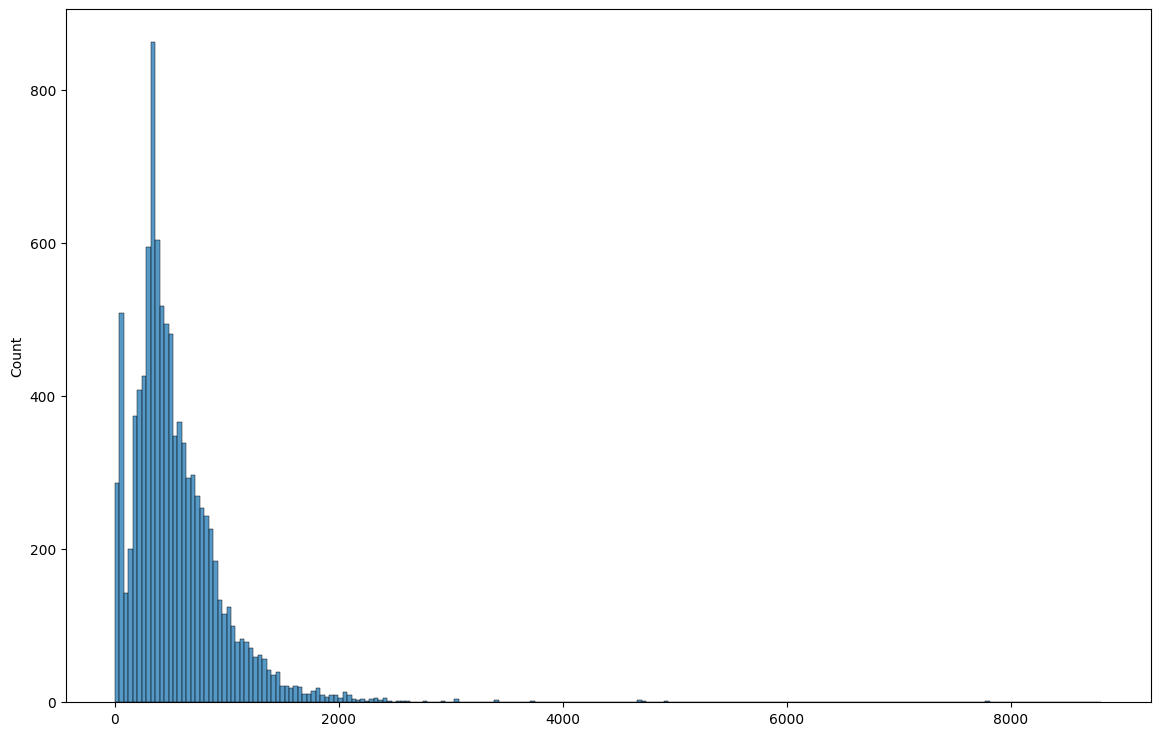

In [9]:
# Next, we examine how long the articles are.  Perhaps we want to 
# throw out the outliers, ie really short articles, which may 
# not really be articles, and also very long articles.
# 
# We do this below, looking at the mean and distribution of article lengths

article_lengths = [(len(x.split())) for x in (corpus.text)]
article_lengths = pd.Series(article_lengths)
plt.figure(figsize = (14,9))
sns.histplot(article_lengths)
pd.Series(article_lengths).describe()

In [10]:
# Let us see how many articles more than 2000 words
len(article_lengths[article_lengths>2000])

125

In [11]:
# Let us see how many articles less than 50 words
len(article_lengths[article_lengths<50])

349

In [12]:
# Let us just keep the regular sized articles, ie those greater than 50
# words, and also remove the excessively long articles.  We are still 
# left with a sizable number in our corpus.

print(10117-349-125)
len(article_lengths[(article_lengths[article_lengths>49]) & (article_lengths[article_lengths<2000])])

9643


/tmp/ipykernel_3964/2276487756.py:6: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  len(article_lengths[(article_lengths[article_lengths>49]) & (article_lengths[article_lengths<2000])])


9643

In [13]:
corpus = corpus[(article_lengths[article_lengths>49]) & (article_lengths[article_lengths<2000])]

/tmp/ipykernel_3964/244724525.py:1: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  corpus = corpus[(article_lengths[article_lengths>49]) & (article_lengths[article_lengths<2000])]


/opt/conda/envs/mggy8413/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    9643.000000
mean      542.166753
std       346.111949
min        50.000000
25%       308.000000
50%       458.000000
75%       722.000000
max      1998.000000
dtype: float64

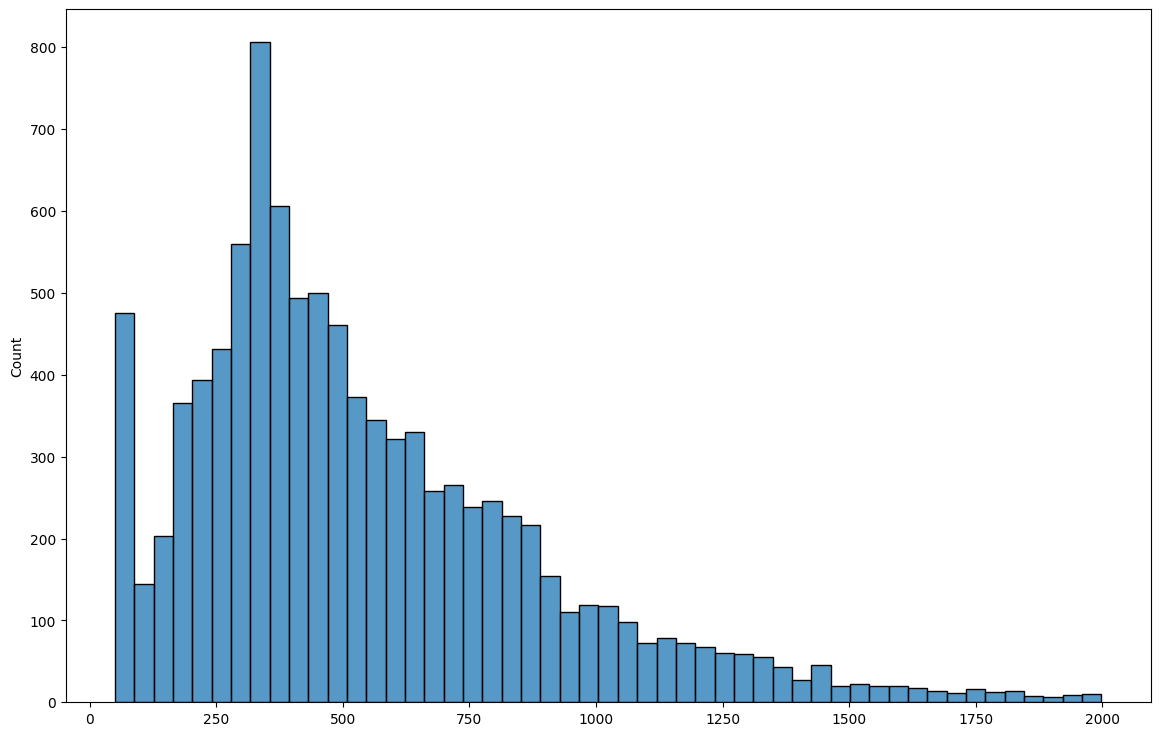

In [14]:
# Next we look at the distribution again

article_lengths = [(len(x.split())) for x in (corpus.text)]
article_lengths = pd.Series(article_lengths)
plt.figure(figsize = (14,9))
sns.histplot(article_lengths)
pd.Series(article_lengths).describe()

Our code becomes really slow if we use all 9600 articles, so we randomly pick just 100 articles from the corpus.  This is just so we can finish in time with the demos.  When you have more time, you can run the code for all the articles too.

In [15]:
# We take only a sample of the entire corpus
# If we want to consider the entire set, we do not need to run this cell

corpus = corpus.sample(100)

In [16]:
# Let us print out a random article

print(corpus.text.iloc[35])

The sudden move by Russia's top law enforcement agency to conduct a very public takedown of the REvil ransomware operation has set tongues wagging about how diplomacy may hold the key to slowing big-game ransomware attacks.

The sting operation, which was followed by a carefully crafted announcement that it was done “at the request of the United States,” comes amidst a larger Russia-Ukraine geo-political conflict that is already being linked to data-wiping malware attacks and targeted web-site defacements.

The U.S. government has publicly blamed Russia for ignoring multiple high-profile ransomware attacks that cripped gas pipelines and disrupted food and beverage operations and the White House last year insisted on “follow-up actions” after sharing data on Russian ransomware wealth transfer activity.

Now, it appears the Russians are signaling a solitary follow-up action in a very deliberate manner, a move no doubt tied to larger diplomatic negotiations surrounding military conflict a

### Embeddings/Feature Extraction

First, we get embeddings for our corpus using a specific model.  We use the 'all-MiniLM-L6-v2' for symmetric queries, and any of the MSMARCO models for asymmetric queries.  The difference between symmetric an asymmetric queries is that the query and the sentences are roughly the same length in symmetric queries.  In asymmetric queries, the query is much smaller than the sentences.

This is based upon the documentation on sentence-bert's website.

In [17]:
# Toy example with just three sentences to see what embeddings look like

from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2') #for symmetric queries
model = SentenceTransformer('msmarco-distilroberta-base-v2') #for asymmetric queries
#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

/opt/conda/envs/mggy8413/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/envs/mggy8413/lib/python3.10/site-packages/transformers/utils/hub.py:123: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
1_Pooling/config.json: 100%|██████████| 190/190 [00:00<00:00, 447kB/s]
README.md: 100%|██████████| 3.73k/3.73k [00:00<00:00, 5.02MB/s]
config_sentence_transformers.json: 100%|██████████| 122/122 [00:00<00:00, 418kB/s]
merges.txt: 100%|██████████| 456k/456k [00:00<00:00, 8.51MB/s]
pytorch_model.bin: 100%|██████████| 329M/329M [00:08<00:00, 36.6MB/s] 
sentence_bert_config.json: 100%|██████████| 53.0/53.0 [00:00<00:00, 128kB/s]
special_tokens_map.json: 100%|██████████| 772/772 [00:00<00:00, 1.73MB/s]
tokenizer.json

Sentence: This framework generates embeddings for each input sentence
Embedding: [-1.94026753e-01 -1.22946471e-01 -1.03668034e-01 -5.60734451e-01
  1.10684834e-01  6.79869235e-01 -6.36456683e-02 -7.55183518e-01
  7.56757021e-01  2.64225602e-01 -1.42992526e-01  3.98469806e-01
  1.76254317e-01 -1.42204297e+00 -2.50023752e-01  6.46364130e-03
  4.95951176e-01  4.63492960e-01 -1.50223663e-02  8.64237010e-01
  1.83196366e-01 -8.47510576e-01 -7.40250051e-01 -1.01876450e+00
 -1.04469287e+00  5.33529937e-01  7.04184294e-01  3.23025227e-01
 -1.34202325e+00 -1.40403345e-01 -1.69760987e-01  9.34997261e-01
 -3.45070988e-01  4.92123514e-02  1.28698675e-02 -1.90801159e-01
  5.31530082e-01 -3.53034884e-01 -9.99689162e-01  1.29575148e-01
  8.10616910e-01  5.22234738e-01 -7.57189989e-01 -2.42323816e-01
  4.81891304e-01 -2.24909976e-01  5.87175131e-01 -9.55266297e-01
 -2.80446976e-01 -5.75490929e-02  1.38305891e+00 -6.43579364e-02
 -2.80887365e-01 -2.96109200e-01  6.02367103e-01 -6.88801706e-01
 -3.63944

In [18]:
embedding.shape

(768,)

In [1]:
%%time
# Use our data

from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2') #for symmetric queries
model = SentenceTransformer('msmarco-distilroberta-base-v2') #for asymmetric queries

#Our sentences we like to encode
sentences = list(corpus.text)

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)



/opt/conda/envs/mggy8413/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
1_Pooling/config.json: 100%|██████████| 190/190 [00:00<00:00, 339kB/s]
README.md: 100%|██████████| 3.73k/3.73k [00:00<00:00, 9.56MB/s]
config_sentence_transformers.json: 100%|██████████| 122/122 [00:00<00:00, 430kB/s]
merges.txt: 100%|██████████| 456k/456k [00:00<00:00, 8.59MB/s]
pytorch_model.bin: 100%|██████████| 329M/329M [00:08<00:00, 40.4MB/s] 
sentence_bert_config.json: 100%|██████████| 53.0/53.0 [00:00<00:00, 205kB/s]
special_tokens_map.json: 100%|██████████| 772/772 [00:00<00:00, 2.48MB/s]
tokenizer.json: 100%|██████████| 1.36M/1.36M [00:00<00:00, 35.1MB/s]
tokenizer_config.json: 100%|██████████| 1.20k/1.20k [00:00<00:00, 3.74MB/s]
vocab.json: 100%|██████████| 798k/798k [00:00<00:00, 42.9MB/s]
modules.json: 100%|██████████|

NameError: name 'corpus' is not defined

In [20]:
# At this point, the variable embeddings contains all our embeddings, one row for each document
# So we expect there to be 100 rows, and as many columns as the model we chose vectorizes text
# into.

embeddings.shape

(100, 768)

In [21]:
# model.save('msmarco-distilroberta-base-v2')

### Cosine similarity between sentences 
Using brute force method, and finding the most similar.  Very compute intensive, will not run if number of sentences is very large.

In [22]:
# This can crash the kernel, don't run unless you want to

run = True
if run:
    from sentence_transformers import SentenceTransformer, util
    #Compute cosine-similarities for each sentence with each other sentence
    cosine_scores = util.cos_sim(embeddings, embeddings)

    #Find the pairs with the highest cosine similarity scores
    pairs = []
    for i in range(len(cosine_scores)-1):
        for j in range(i+1, len(cosine_scores)):
            pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

    #Sort scores in decreasing order
    pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)



In [23]:
pairs[:10]

[{'index': [67, 98], 'score': tensor(0.7903)},
 {'index': [28, 49], 'score': tensor(0.7720)},
 {'index': [28, 67], 'score': tensor(0.7470)},
 {'index': [67, 90], 'score': tensor(0.7131)},
 {'index': [51, 98], 'score': tensor(0.7115)},
 {'index': [36, 66], 'score': tensor(0.7109)},
 {'index': [65, 84], 'score': tensor(0.6998)},
 {'index': [6, 67], 'score': tensor(0.6828)},
 {'index': [67, 95], 'score': tensor(0.6824)},
 {'index': [6, 98], 'score': tensor(0.6670)}]

In [24]:
print(corpus.iloc[60].text)

Friday Squid Blogging: Squid Game Cryptocurrency Was a Scam

The Squid Game cryptocurrency was a complete scam:

The SQUID cryptocurrency peaked at a price of $2,861 before plummeting to $0 around 5:40 a.m. ET., according to the website CoinMarketCap. This kind of theft, commonly called a “rug pull” by crypto investors, happens when the creators of the crypto quickly cash out their coins for real money, draining the liquidity pool from the exchange.

I don’t know why anyone would trust an investment — any investment — that you could buy but not sell.

Wired story.

As usual, you can also use this squid post to talk about the security stories in the news that I haven’t covered.

Read my blog posting guidelines here.

Posted on November 5, 2021 at 4:11 PM • 42 Comments


In [25]:
print(corpus.iloc[79].text)

A suspected Ukrainian hacker has been arrested and charged in the United States in connection with a string of costly ransomware attacks, including one that snarled businesses around the globe on the Fourth of July weekend, U.S. officials said Monday.

Yaroslav Vasinskyi was arrested last month after traveling to Poland, according to the Justice Department, which also announced the recovery of $6.1 million in ill-gotten funds from a Russian national who was separately charged and remains sought by the FBI.

Both men are alleged to be affiliated with the prolific Russia-based REvil ransomware gang, whose attacks have compromised tens of thousands of computers worldwide and yielded at least $200 million in ransom payments, said Attorney General Merrick Garland. Victims have included the world’s largest meat processor, JBS SA, and a technology company called Kaseya, which was hit in a holiday weekend attack last July that the company said affected between 800 and 1,500 businesses that rel

In [26]:
print(corpus.iloc[81].values[0])

Immediately after the public release of the exploit code for the VMware vCenter CVE-2021-22005 flaw threat actors started using it.

Researchers warn that immediately after the release of the exploit code for the recently addressed CVE-2021-22005 flaw in VMware vCenter threat actors started using it.

The CVE-2021-22005 issue is a critical arbitrary file upload vulnerability that impacts appliances running default vCenter Server 6.7 and 7.0 deployments.

vCenter Server is the centralized management utility for VMware, and is used to manage virtual machines, multiple ESXi hosts, and all dependent components from a single centralized location.

The vulnerability is due to the way it handles session tokens.

“VMware has released patches that address a new critical security advisory, VMSA-2021-0020. This needs your immediate attention if you are using vCenter Server.” reads the advisory published by the virtualization giant. “The VMSA outlines a number of issues that are resolved in this p

### Semantic paraphrasing
Finds similar articles, except more efficient

In [27]:
%%time
from sentence_transformers import SentenceTransformer, util

# model = SentenceTransformer('all-MiniLM-L6-v2')

# Single list of sentences - Possible tens of thousands of sentences
sentences = list(corpus.text)

paraphrases = util.paraphrase_mining(model, sentences)

# below code good only for small articles
# for paraphrase in paraphrases[0:25]:
#     score, i, j = paraphrase
#     print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], score))
    
paraphrases[:10]

CPU times: user 42 s, sys: 8.02 s, total: 50 s
Wall time: 50.2 s


[[0.7903256416320801, 67, 98],
 [0.7719780206680298, 28, 49],
 [0.7470053434371948, 28, 67],
 [0.7130910754203796, 67, 90],
 [0.7114944458007812, 51, 98],
 [0.7108569741249084, 36, 66],
 [0.6997889876365662, 65, 84],
 [0.6828299164772034, 6, 67],
 [0.6824029088020325, 67, 95],
 [0.6669973731040955, 6, 98]]

In [28]:
print(sentences[55])

Up for the “Most Meta Cybercrime Offering” award this year is Accountz Club, a new cybercrime store that sells access to purloined accounts at services built for cybercriminals, including shops peddling stolen payment cards and identities, spamming tools, email and phone bombing services, and those selling authentication cookies for a slew of popular websites.

Criminals ripping off other crooks is a constant theme in the cybercrime underworld; Accountz Club’s slogan — “the best autoshop for your favorite shops’ accounts” — just normalizes this activity by making logins stolen from users of various cybercrime shops for sale at a fraction of their account balances.

The site says it sells “cracked” accounts, or those that used passwords which could be easily guessed or enumerated by automated tools. All of the credentials being sold by Accountz provide access to services that in turn sell access to stolen information or hijacked property, as in the case of “bot shops” that resell access

In [29]:
print(sentences[72])

Cisco fixed three critical flaws impacting IOS XE operating system powering some of its devices, such as routers and wireless controllers.

Cisco has addressed three critical vulnerabilities impacting its IOS XE operating system powering multiple products, including routers and wireless controllers.

The most severe of these vulnerabilities is a Remote Code Execution Vulnerability, tracked as CVE-2021-34770, in the Control and Provisioning of Wireless Access Points (CAPWAP) protocol processing of Cisco IOS XE Software for Cisco Catalyst 9000 Family Wireless Controller.

“A vulnerability in the Control and Provisioning of Wireless Access Points (CAPWAP) protocol processing of Cisco IOS XE Software for Cisco Catalyst 9000 Family Wireless Controllers could allow an unauthenticated, remote attacker to execute arbitrary code with administrative privileges or cause a denial of service (DoS) condition on an affected device.” reads the advisory published by Cisco.

The flaw is due to a logic e

### Semantic Search

In [30]:
# Query sentence - one at a time:
query = ['vaccine for children']



# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))

query_embedding = model.encode(query, convert_to_tensor=True)

# We use cosine-similarity and torch.topk to find the highest 5 scores
cos_scores = util.cos_sim(query_embedding, embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

score, idx = top_results[0], top_results[1]

for index, i in enumerate(idx):
    print('\n------Similarly score is', score[index])
    print(corpus.text.iloc[int(i)])
    print('\n---------------------\n---------------------\n---------------------')
    
    


------Similarly score is tensor(0.2778)
Valve announced this week that its prestigious Dota 2 tournament The International will require all attendees to be fully masked and vaccinated for entry.

As noted on the Dota 2 site, anyone attending the October competition at the National Arena in Bucharest, Romania, must be at least 10 days out from their final vaccination, and attendees will need to present proof of inoculation (which must be in either English or Romanian) along with a photo ID to gain access to the event grounds and tournament arena. All attendees must also wear a mask and proof-of-vaccination wristband along with their registration badges. Additional safety protocols will be put into place throughout the tournament.

Now in its 10th year, The International gathers the best Dota 2 teams from around the globe to compete for a multimillion-dollar prize pool. But over the past year, Valve has not had an easy time with COVID-related restrictions for its annual tournament. The 

In [31]:
query_embedding.shape

torch.Size([1, 768])

In [32]:
embeddings.shape

(100, 768)

### Clustering
#### KMeans

In [33]:
from sklearn.cluster import KMeans

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters, n_init='auto')
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(list(corpus.text)[sentence_id])

# for i, cluster in enumerate(clustered_sentences):
#     print("Cluster ", i+1)
#     print(cluster)
#     print("")

In [34]:
clustering_model.labels_.shape

(100,)

In [35]:
cluster_assignment

array([0, 3, 4, 3, 4, 3, 1, 3, 1, 1, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 3, 2, 3, 4, 1, 2, 2, 3, 3, 3, 3, 0, 3, 4, 2, 3, 4, 3, 2, 3,
       3, 4, 3, 3, 3, 1, 3, 1, 1, 1, 1, 3, 0, 3, 0, 4, 3, 0, 2, 2, 3, 4,
       0, 1, 1, 3, 0, 1, 1, 3, 1, 1, 0, 4, 3, 0, 3, 1, 3, 3, 4, 3, 1, 2,
       4, 3, 1, 0, 3, 2, 0, 1, 3, 3, 1, 2], dtype=int32)

In [36]:
pd.Series(cluster_assignment).value_counts()

3    44
1    20
2    13
0    12
4    11
Name: count, dtype: int64

## Huggingface Pipeline function
The Huggingface Pipeline function wraps everything together for a number of common NLP tasks.  

The format for the commands is as below:

```python
from transformers import pipeline

# Using default model and tokenizer for the task
pipeline("<task-name>")

# Using a user-specified model
pipeline("<task-name>", model="<model_name>")

# Using custom model/tokenizer as str
pipeline('<task-name>', model='<model name>', tokenizer='<tokenizer_name>')
```



By default, pipeline selects a particular pretrained model that has been fine-tuned for the specified task. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

Pipelines are made of:

 - A tokenizer in charge of mapping raw textual input to token.
 - A model to make predictions from the inputs.
 - Some (optional) post processing for enhancing model’s output.

Some of the currently available pipelines are:

- feature-extraction (get the vector representation of a text)  
- fill-mask  
- ner (named entity recognition)  
- question-answering  
- sentiment-analysis  
- summarization  
- text-generation  
- translation  
- zero-shot-classification  

Each pipeline has a default model, which can be obtained from https://github.com/huggingface/transformers/blob/main/src/transformers/pipelines/__init__.py

Pipeline | Default Model
-----|-----
"feature-extraction" | "distilbert-base-cased"
"fill-mask" | "distilroberta-base"
"ner" | "t5-base"
"question-answering" | "distilbert-base-cased-distilled-squad"
"summarization" | "sshleifer/distilbart-cnn-12-6"
"translation" | "t5-base"
"text-generation" | "gpt2"
"text2text-generation" | "t5-base"
"zero-shot-classification" | "facebook/bart-large-mnli"
"conversational" | "microsoft/DialoGPT-medium"

**First, some library imports**  

In [2]:
# First, some library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import torch

from transformers import AutoTokenizer, AutoModel, pipeline

2024-01-16 20:01:12.061135: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-16 20:01:12.644825: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/nvidia/lib64
2024-01-16 20:01:12.644866: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-16 20:01:15.627549: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared o

In [38]:
mytext = """
Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibility across cloud and on-premise infrastructure, and build data lakes for incident response investigations.

In the last year, Panther claims its customer roster grew by 300 percent, including deals with big companies like Dropbox, Zapier and Snyk.

Panther Labs said the new funding will be used to speed up product development, expand go-to-marketing initiatives and scale support for its customers.

Related: Panther Labs Launches Open-Source Cloud-Native SIEM

Related: CyCognito Snags $100 Million for Attack Surface Management
"""

In [39]:
print(len(mytext.split()))
print(mytext)

224

Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibil

In [4]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

### Embeddings/Feature Extraction

Feature extraction allows us to obtain embeddings for a sentence.  This is similar (in fact identical) to embeddings obtained from sentence-transformers.

In [41]:
pwd

'/home/instructor/shared'

In [5]:
feature_extraction = pipeline('feature-extraction')
features = feature_extraction("i am awesome")
features = np.squeeze(features)
print(features.shape)

No model was supplied, defaulted to distilbert-base-cased and revision 935ac13 (https://huggingface.co/distilbert-base-cased).
Using a pipeline without specifying a model name and revision in production is not recommended.


(5, 768)


In [43]:
# If you summarize by column, you get the same results as `model.encode` with sentence-bert
features = np.mean(features, axis=0)

In [44]:
features.shape

(768,)

In [45]:
# Let us try feature extraction on mytext
features = feature_extraction(mytext)
features = np.squeeze(features)
print(features.shape)

(322, 768)


### Fill Mask

In [6]:
fill_mask = pipeline('fill-mask') 
fill_mask('New York is a <mask>')

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
config.json: 100%|██████████| 480/480 [00:00<00:00, 1.56MB/s]
model.safetensors: 100%|██████████| 331M/331M [00:01<00:00, 174MB/s] 
Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
vocab.js

[{'score': 0.10091249644756317,
  'token': 8018,
  'token_str': ' joke',
  'sequence': 'New York is a joke'},
 {'score': 0.04816770926117897,
  'token': 4593,
  'token_str': ' democracy',
  'sequence': 'New York is a democracy'},
 {'score': 0.046186525374650955,
  'token': 7319,
  'token_str': ' mess',
  'sequence': 'New York is a mess'},
 {'score': 0.04198995232582092,
  'token': 20812,
  'token_str': ' circus',
  'sequence': 'New York is a circus'},
 {'score': 0.024249713867902756,
  'token': 43689,
  'token_str': ' wasteland',
  'sequence': 'New York is a wasteland'}]

In [7]:
fill_mask = pipeline('fill-mask', model = 'distilroberta-base')
fill_mask('New <mask> is a great city')

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'score': 0.42242366075515747,
  'token': 469,
  'token_str': ' York',
  'sequence': 'New York is a great city'},
 {'score': 0.2367219477891922,
  'token': 4942,
  'token_str': ' Orleans',
  'sequence': 'New Orleans is a great city'},
 {'score': 0.08853636682033539,
  'token': 3123,
  'token_str': ' Jersey',
  'sequence': 'New Jersey is a great city'},
 {'score': 0.06783503293991089,
  'token': 3534,
  'token_str': ' Delhi',
  'sequence': 'New Delhi is a great city'},
 {'score': 0.032185353338718414,
  'token': 12050,
  'token_str': ' Haven',
  'sequence': 'New Haven is a great city'}]

In [48]:
fill_mask('Joe Biden is a good <mask>')

[{'score': 0.09071359038352966,
  'token': 2173,
  'token_str': ' guy',
  'sequence': 'Joe Biden is a good guy'},
 {'score': 0.07118405401706696,
  'token': 1441,
  'token_str': ' friend',
  'sequence': 'Joe Biden is a good friend'},
 {'score': 0.0398402214050293,
  'token': 30443,
  'token_str': ' listener',
  'sequence': 'Joe Biden is a good listener'},
 {'score': 0.033013053238391876,
  'token': 28587,
  'token_str': ' liar',
  'sequence': 'Joe Biden is a good liar'},
 {'score': 0.030751364305615425,
  'token': 313,
  'token_str': ' man',
  'sequence': 'Joe Biden is a good man'}]

In [49]:
fill_mask('Joe Biden is in a good <mask>')

[{'score': 0.8292388319969177,
  'token': 6711,
  'token_str': ' mood',
  'sequence': 'Joe Biden is in a good mood'},
 {'score': 0.040497805923223495,
  'token': 3989,
  'token_str': ' shape',
  'sequence': 'Joe Biden is in a good shape'},
 {'score': 0.02688235603272915,
  'token': 317,
  'token_str': ' place',
  'sequence': 'Joe Biden is in a good place'},
 {'score': 0.024332040920853615,
  'token': 1514,
  'token_str': ' spot',
  'sequence': 'Joe Biden is in a good spot'},
 {'score': 0.013950918801128864,
  'token': 737,
  'token_str': ' position',
  'sequence': 'Joe Biden is in a good position'}]

### Sentiment Analysis (+ve/-ve)

In [3]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['HF_HOME'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['HF_HOME'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [4]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

classifier("It was sort of ok")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9996662139892578}]

In [52]:
classifier(mytext)

[{'label': 'POSITIVE', 'score': 0.8596643209457397}]

### Named Entity Recognition  

Identify tokens as belonging to one of 9 classes:

```
O, Outside of a named entity
B-MIS, Beginning of a miscellaneous entity right after another miscellaneous entity
I-MIS, Miscellaneous entity
B-PER, Beginning of a person’s name right after another person’s name
I-PER, Person’s name
B-ORG, Beginning of an organisation right after another organisation
I-ORG, Organisation
B-LOC, Beginning of a location right after another location
I-LOC, Location
```

In [53]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [5]:
ner = pipeline("ner") 

ner("Seattle is a city in Washington where Microsoft is headquartered")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


[{'entity': 'I-LOC',
  'score': 0.99756324,
  'index': 1,
  'word': 'Seattle',
  'start': 0,
  'end': 7},
 {'entity': 'I-LOC',
  'score': 0.9981115,
  'index': 6,
  'word': 'Washington',
  'start': 21,
  'end': 31},
 {'entity': 'I-ORG',
  'score': 0.9993381,
  'index': 8,
  'word': 'Microsoft',
  'start': 38,
  'end': 47}]

In [55]:
ner(mytext)

[{'entity': 'I-ORG',
  'score': 0.99932563,
  'index': 1,
  'word': 'Panther',
  'start': 1,
  'end': 8},
 {'entity': 'I-ORG',
  'score': 0.9993229,
  'index': 2,
  'word': 'Labs',
  'start': 9,
  'end': 13},
 {'entity': 'I-ORG',
  'score': 0.9992663,
  'index': 37,
  'word': 'Co',
  'start': 171,
  'end': 173},
 {'entity': 'I-ORG',
  'score': 0.9986853,
  'index': 38,
  'word': '##at',
  'start': 173,
  'end': 175},
 {'entity': 'I-ORG',
  'score': 0.999196,
  'index': 39,
  'word': '##ue',
  'start': 175,
  'end': 177},
 {'entity': 'I-ORG',
  'score': 0.99944323,
  'index': 40,
  'word': 'Management',
  'start': 178,
  'end': 188},
 {'entity': 'I-ORG',
  'score': 0.9994549,
  'index': 42,
  'word': 'Panther',
  'start': 191,
  'end': 198},
 {'entity': 'I-ORG',
  'score': 0.9986261,
  'index': 43,
  'word': 'Labs',
  'start': 199,
  'end': 203},
 {'entity': 'I-ORG',
  'score': 0.99832755,
  'index': 85,
  'word': 'Co',
  'start': 367,
  'end': 369},
 {'entity': 'I-ORG',
  'score': 0.99

### Question Answering

In [6]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['HF_HOME'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['HF_HOME'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [7]:
from transformers import pipeline

question_answerer = pipeline("question-answering") 

question_answerer(
    question="Where do I work?",
    context="My name is Mukul and I work at NYU Tandon in Brooklyn",
)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


{'score': 0.7861830592155457, 'start': 31, 'end': 41, 'answer': 'NYU Tandon'}

In [58]:
print(mytext)


Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibility 

In [59]:
question_answerer(
    question = "How much did Panther Labs raise",
    context = mytext,
)

{'score': 0.02731623686850071,
 'start': 249,
 'end': 261,
 'answer': '$1.4 billion'}

In [60]:
question_answerer(
    question = "How much did Panther Labs raise previously",
    context = mytext,
)

{'score': 0.6693973541259766,
 'start': 600,
 'end': 611,
 'answer': '$15 million'}

In [61]:
question_answerer(
    question = "Who founded Panter Labs",
    context = mytext,
)

{'score': 2.9083561457809992e-05,
 'start': 694,
 'end': 715,
 'answer': 'Airbnb and AWS alumni'}

### Summarization

In [62]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")

summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China anbd India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
mytext = """
Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibility across cloud and on-premise infrastructure, and build data lakes for incident response investigations.

In the last year, Panther claims its customer roster grew by 300 percent, including deals with big companies like Dropbox, Zapier and Snyk.

Panther Labs said the new funding will be used to speed up product development, expand go-to-marketing initiatives and scale support for its customers.

Related: Panther Labs Launches Open-Source Cloud-Native SIEM

Related: CyCognito Snags $100 Million for Attack Surface Management
"""

In [ ]:
summarizer(mytext)

### Translation

In [3]:
# Set default locations for downloaded models
import os
from transformers import pipeline

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['HF_HOME'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['HF_HOME'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

2024-01-16 20:05:25.243741: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-16 20:05:25.893935: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/nvidia/lib64
2024-01-16 20:05:25.893967: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-16 20:05:28.750728: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared o

In [4]:
translator = pipeline("translation_en_to_fr")
translator("I do not speak French")

No model was supplied, defaulted to t5-base and revision 686f1db (https://huggingface.co/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/opt/conda/envs/mggy8413/lib/python3.10/site-packages/transformers/models/t5/tokenization_t5_fast.py:160: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


[{'translation_text': 'Je ne parle pas français'}]

### Text Generation

In [5]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['HF_HOME'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['HF_HOME'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [6]:
generator = pipeline("text-generation")

generator("In this course, we will teach you how to", max_length = 100, num_return_sequences=4)

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "In this course, we will teach you how to manipulate the data as well as get you started in creating a real-time database. In our second course, we will guide you through what is expected of data structures such as MySQL, PostgreSQL, Spark and OAuth.\n\nThe courses will cover how to create a Database using SQL's Sqlite API and how to create a MySQL application using the ExpressSQL API.\n\nWe will go in depth on using SQL commands to query the"},
 {'generated_text': "In this course, we will teach you how to use both the JavaScript and Scala collections\n\nA common problem with a Scala REPL is to have lots of nested collections, so you want to know many things about one particular collection. Well you can be sure we could run some real Javascript and Javascript library (we'll be using Scala by virtue of which!) that would run this JavaScript code and read its output. Once we have these collections, we need to be able to do one more thing in that"},
 {'generated_text':

### Zero Shot Classification

In [7]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['HF_HOME'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['HF_HOME'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [8]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")

classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'This is a course about the Transformers library',
 'labels': ['education', 'business', 'politics'],
 'scores': [0.8445992469787598, 0.11197403818368912, 0.04342671483755112]}

In [ ]:
classifier(mytext, candidate_labels=["education", "politics", "business"])

### Text to text generation
Text2TextGeneration can be used for a variety of NLP tasks like question answering, sentiment classification, question generation, translation, paraphrasing, summarization, etc.

Refer details at:  
https://theaidigest.in/text2textgeneration-pipeline-by-huggingface-transformers/  

There are some interesting things this pipeline can do, for example:  


#### Question Answering

In [9]:
# Set default locations for downloaded models
import os

if os.name != 'nt':  # Do this only if in a non-Windows environment
    
    if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
        os.environ['HF_HOME'] = '/home/instructor/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
    else: # Set default model locations when logged in as a student
        os.environ['HF_HOME'] = '/home/jovyan/shared/huggingface'
        os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [ ]:
from transformers import pipeline
text2text_generator = pipeline("text2text-generation", model = 't5-base') 

text2text_generator("question: What is 42 ? context: 42 is the answer to life, the universe and everything")

#### Summarization

In [ ]:
mytext = """
Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibility across cloud and on-premise infrastructure, and build data lakes for incident response investigations.

In the last year, Panther claims its customer roster grew by 300 percent, including deals with big companies like Dropbox, Zapier and Snyk.

Panther Labs said the new funding will be used to speed up product development, expand go-to-marketing initiatives and scale support for its customers.

Related: Panther Labs Launches Open-Source Cloud-Native SIEM

Related: CyCognito Snags $100 Million for Attack Surface Management
"""

In [ ]:
text2text_generator("summarize: Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, \
                     in particular how to program computers to process and analyze large amounts of natural language data.")

In [ ]:
text2text_generator("summarize: " + mytext)

#### Sentiment Analysis

In [ ]:
text2text_generator("sst2 sentence: The vastness of space offers many opportunities for humanity.")